In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models ,callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.regularizers import l2


In [8]:
# Define paths to your dataset
train_dir = r"C:\Users\Pranshu Saini\Desktop\kvasir-dataset-v2"
val_dir = r"C:\Users\Pranshu Saini\Desktop\kvasir-dataset-v2"
test_dir = r"C:\Users\Pranshu Saini\Desktop\kvasir-dataset-v2"


In [9]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Adjust as needed
)

In [10]:
# Create generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 640 images belonging to 8 classes.


In [11]:
validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 160 images belonging to 8 classes.


In [13]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(86, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')  # 8 classes
])


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,# Adjust the number of epochs as needed
    callbacks=[early_stopping, reduce_lr]

)


Epoch 1/50


C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.2144 - loss: 1.9075 - val_accuracy: 0.3875 - val_loss: 1.2497 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50


C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3948 - loss: 1.3186 - val_accuracy: 0.4938 - val_loss: 1.1272 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5008 - loss: 1.1370 - val_accuracy: 0.4125 - val_loss: 1.3355 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5106 - loss: 1.0952 - val_accuracy: 0.5625 - val_loss: 0.9357 - learning_rate: 0.0010
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5415 - loss: 1.0339 - val_accuracy: 0.4875 - val_loss: 1.0081 - learning_rate: 0.0010
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

In [16]:

# Evaluate the model on test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No labels since this is for prediction
    shuffle=False
)


Found 800 images belonging to 8 classes.


In [17]:

# Get predictions
predictions = model.predict(test_generator)

# Print predictions
print(predictions)


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step
[[2.7925515e-01 7.2074479e-01 6.8539563e-08 ... 7.0747999e-09
  6.2271653e-11 1.6053661e-10]
 [5.1475084e-01 4.8351848e-01 9.8645699e-04 ... 4.8168644e-04
  1.4599333e-04 8.8106863e-05]
 [4.9090138e-01 5.0847340e-01 3.3537275e-05 ... 3.2313362e-06
  1.9119192e-04 1.3957203e-04]
 ...
 [1.0477213e-06 9.9247309e-08 4.2902898e-06 ... 1.1414927e-08
  2.4947502e-02 9.7450268e-01]
 [7.1844794e-03 1.0628366e-03 5.0757129e-02 ... 2.8808422e-02
  1.0748498e-01 3.5846263e-01]
 [6.3568277e-06 1.9369286e-06 3.7642883e-06 ... 2.5173827e-08
  4.0510021e-02 9.3781292e-01]]


In [18]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 7, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 6, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 7, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 6, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 5, 2, 5, 5, 5, 5, 4, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2,
       2, 5, 2, 2, 5, 2, 4, 2, 5, 2, 5, 2, 5, 5, 2, 2, 5, 5, 4, 2, 2, 2,
       5, 2, 2, 5, 2, 5, 2, 2, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 5, 2, 4,
       5, 2, 2, 2, 2, 5, 2, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2,
       2, 5, 2, 2, 2, 5, 5, 2, 5, 5, 2, 2, 2, 2, 6,

In [19]:
true_classes = test_generator.classes
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [20]:
accuracy = np.mean(predicted_classes == true_classes)
accuracy

0.70125

In [21]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
conf_matrix

array([[60, 36,  0,  0,  0,  0,  2,  2],
       [39, 61,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  4, 35,  0,  0],
       [ 0,  0,  0, 87,  0,  0, 12,  1],
       [ 0,  0,  0,  0, 96,  1,  1,  2],
       [ 0,  0, 28,  0,  1, 71,  0,  0],
       [ 2,  0,  0,  8,  4,  1, 65, 20],
       [ 0,  0,  1, 11,  6,  0, 22, 60]], dtype=int64)

In [22]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.59      0.60      0.60       100
dyed-resection-margins       0.63      0.61      0.62       100
           esophagitis       0.68      0.61      0.64       100
          normal-cecum       0.82      0.87      0.84       100
        normal-pylorus       0.86      0.96      0.91       100
         normal-z-line       0.66      0.71      0.68       100
                polyps       0.64      0.65      0.64       100
    ulcerative-colitis       0.71      0.60      0.65       100

              accuracy                           0.70       800
             macro avg       0.70      0.70      0.70       800
          weighted avg       0.70      0.70      0.70       800



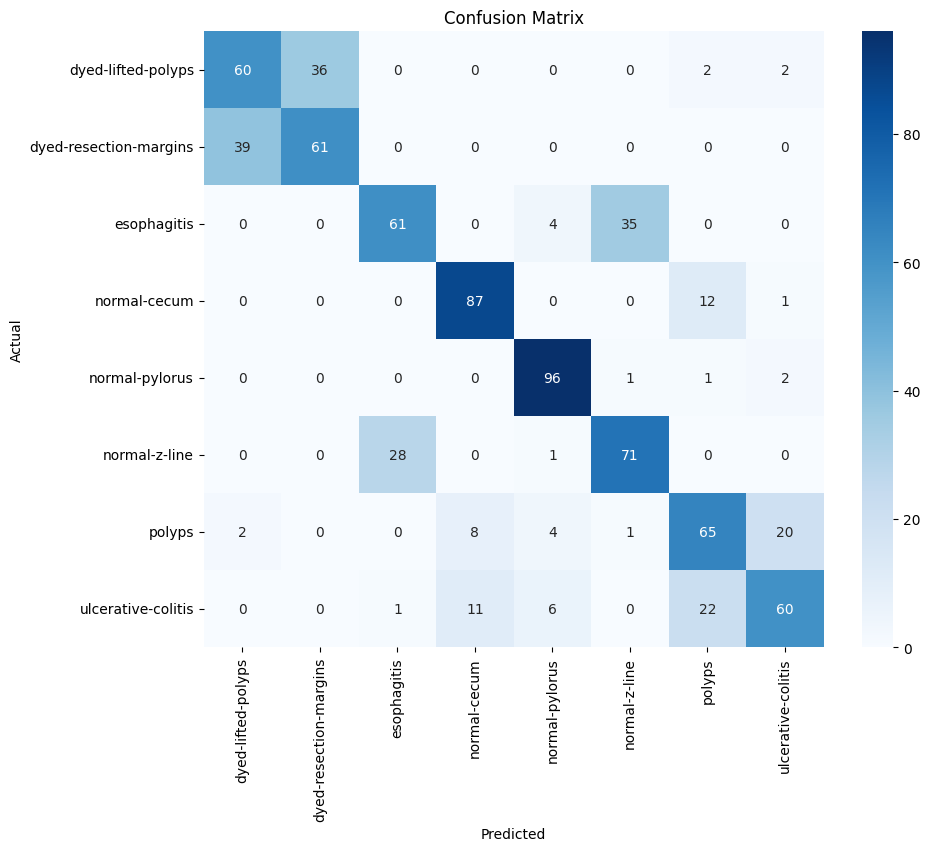

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

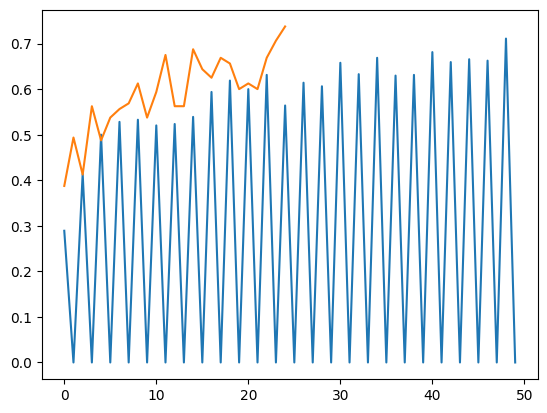

In [24]:
plt .plot(history.history['accuracy'])
plt .plot(history.history['val_accuracy'])

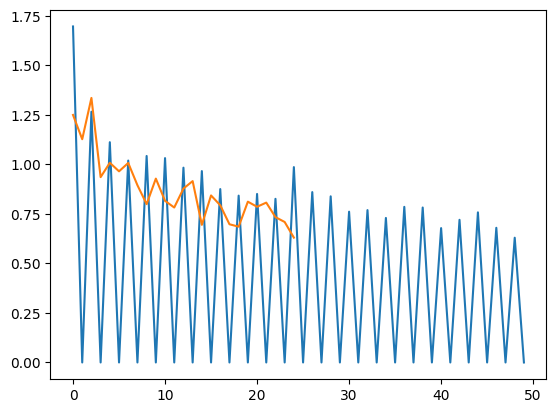

In [25]:
plt .plot(history.history['loss'])
plt .plot(history.history['val_loss'])

In [32]:
# Build CNN model
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

model1 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
       layers.BatchNormalization(),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        layers.BatchNormalization(),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        layers.BatchNormalization(),

    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(8, activation='softmax')  # 8 classes
])


C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
model1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


# Callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 150s 6s/step - accuracy: 0.3441 - loss: 11.1879 - val_accuracy: 0.1250 - val_loss: 11.6264 - learning_rate: 0.0100
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0100
Epoch 3/50


C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\Pranshu Saini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.5551 - loss: 10.4663 - val_accuracy: 0.1250 - val_loss: 11.8596 - learning_rate: 0.0100
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0100
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.6193 - loss: 10.2604 - val_accuracy: 0.2125 - val_loss: 11.9697 - learning_rate: 0.0100
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0100
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.6053 - loss: 10.1444 - val_accuracy: 0.1562 - val_loss: 12.1680 - learning_rate: 0.0100
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0100
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.6610 - loss: 9.9899 - val_accuracy: 0.1250 - val_loss: 12.3220 - learning_rate: 0.0100
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/st

In [35]:

# Get predictions
predictions1 = model1.predict(test_generator)

# Print predictions
print(predictions1)


25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step
[[0.06909288 0.05716885 0.26032794 ... 0.14902377 0.07332629 0.05773844]
 [0.06980904 0.05207357 0.2673124  ... 0.1315317  0.08464761 0.05651353]
 [0.06256106 0.05227286 0.24118589 ... 0.13614461 0.07792334 0.057269  ]
 ...
 [0.0628304  0.0531861  0.24194163 ... 0.1465623  0.0854286  0.0697784 ]
 [0.05964954 0.05556795 0.24669608 ... 0.15441857 0.0760019  0.06508327]
 [0.06581499 0.05263651 0.23064825 ... 0.13595185 0.08379588 0.06999677]]


In [36]:
predicted_classes1 = np.argmax(predictions1, axis=1)
predicted_classes1

array([2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [37]:
true_classes1 = test_generator.classes
true_classes1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [38]:
accuracy1 = np.mean(predicted_classes1 == true_classes1)
accuracy1

0.1325

In [39]:
conf_matrix1 = confusion_matrix(true_classes1, predicted_classes1)
conf_matrix1

array([[  0,   0,  25,   0,  75,   0,   0,   0],
       [  0,   0,  19,   0,  81,   0,   0,   0],
       [  0,   0,   6,   0,  94,   0,   0,   0],
       [  0,   0,   4,   0,  96,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   3,   0,  97,   0,   0,   0],
       [  0,   0,   9,   0,  91,   0,   0,   0],
       [  0,   0,   9,   0,  91,   0,   0,   0]], dtype=int64)